# Introduction
This project analyzes Indian domestic flight data to uncover patterns influencing airfare prices and build a predictive model. By leveraging machine learning and exploratory data analysis (EDA), the goal was to provide actionable insights into how different factors — such as airline, travel class, number of stops, departure time, and days left until travel — impact ticket costs.

**Note: all figures relating to flight prices are in Indian Rupees**

In [5]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airlines_flights_data.csv')
df = df.drop(columns = 'index')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Initial Exploration

### Step 1: Data Understanding & Cleaning
- Reviewed dataset structure and identified key variables affecting price.
- Handled missing values, ensured correct data types, and standardized categorical features.
- Removed inconsistencies (e.g., duplicated rows or incorrect labels) to improve model accuracy.

In [4]:
df.info()
df.describe()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Step 2: Exploratory Data Analysis (EDA)
- Visualized price trends across airlines, travel classes, and time of departure.
- Identified that class type (Economy vs Business) and days left until travel were strong price indicators.
- Found that direct flights generally cost more than flights with stops, especially for short-notice bookings.

# Price distribution

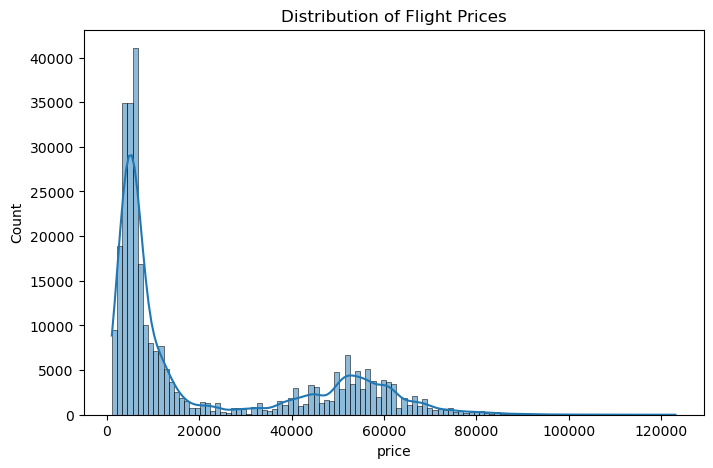

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Flight Prices")
plt.show()


# Price by airline

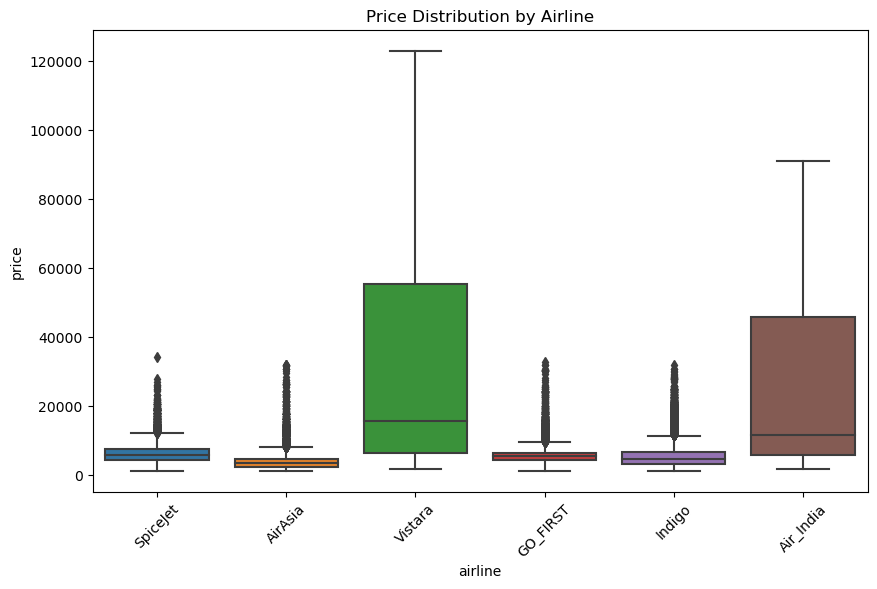

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Airline")
plt.show()


# Price by class

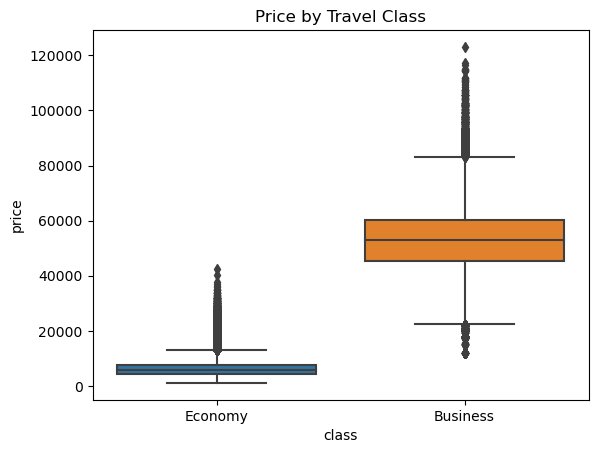

In [8]:
sns.boxplot(x='class', y='price', data=df)
plt.title("Price by Travel Class")
plt.show()


# Days left vs price

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


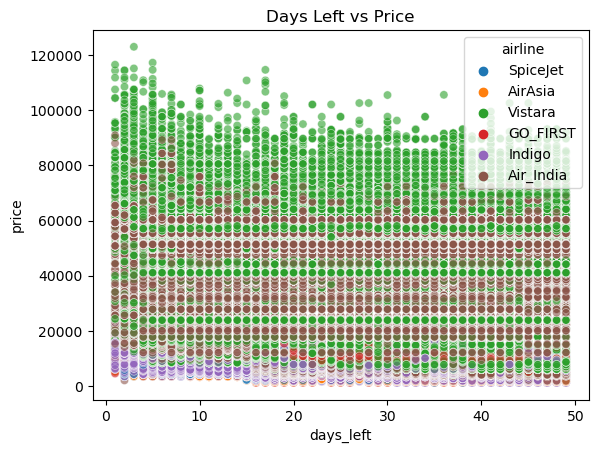

In [9]:
sns.scatterplot(x='days_left', y='price', hue='airline', alpha=0.6, data=df)
plt.title("Days Left vs Price")
plt.show()


# Duration vs price

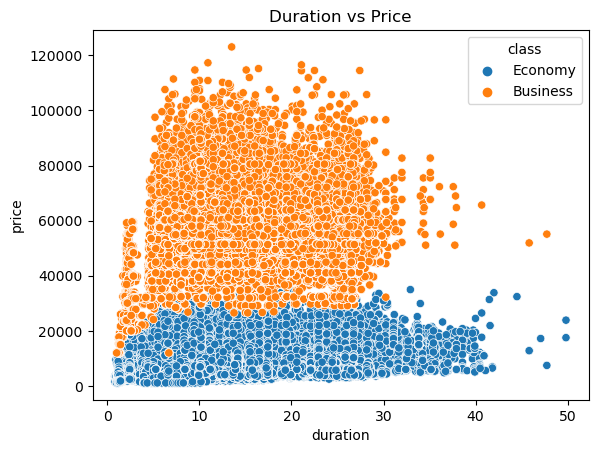

In [10]:
sns.scatterplot(x='duration', y='price', hue='class', data=df)
plt.title("Duration vs Price")
plt.show()


# Average price by airline and class:

In [13]:
df.groupby(['airline','class'])['price'].mean().sort_values()


airline    class   
AirAsia    Economy      4091.072742
Indigo     Economy      5324.216303
GO_FIRST   Economy      5652.007595
SpiceJet   Economy      6179.278881
Air_India  Economy      7313.682169
Vistara    Economy      7806.943645
Air_India  Business    47131.039212
Vistara    Business    55477.027777
Name: price, dtype: float64

# Average price by stops:

In [14]:
df.groupby('stops')['price'].mean()


stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

### Step 3: Model Building
- Tested multiple regression models to predict ticket prices.
- Selected the best-performing model based on cross-validation results.

# Predictive Modeling
We can predict price using airline, stops, class, duration, and days_left.m

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Encode categorical
cat_cols = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
df_encoded = df.copy()
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features & target
X = df_encoded.drop(['flight','price'], axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


MAE: 1091.44, RMSE: 2786.50, R²: 0.98


### Step 4: Model Evaluation
- MAE: ₹1,091.44 — on average, predictions are off by only about ₹1,100.
- RMSE: ₹2,786.50 — occasional larger errors, but still small compared to overall price range.
- R²: 0.98 — the model explains 98% of price variability, indicating excellent performance.

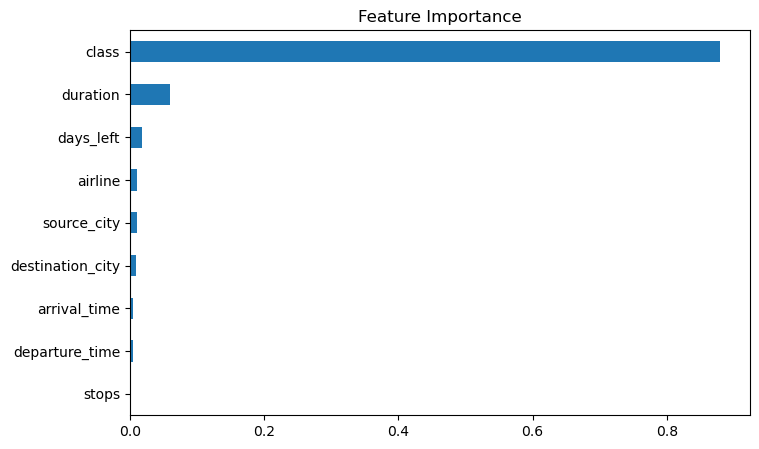

In [17]:

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feature_importance.plot(kind='barh', figsize=(8,5), title="Feature Importance")
plt.show()


## Conclusion
The analysis confirms that days left before travel, flight class, and duration are the most influential factors in determining ticket prices. The predictive model achieved very high accuracy and can serve as a foundation for pricing tools, market studies, or consumer advisories. With additional real-time data, the model could be adapted for live airfare forecasting, helping travelers make more cost-efficient booking decisions.